In [1]:
from matplotlib.pyplot import draw, fill
import pyrender
import trimesh
from trimesh import remesh
import pandas as pd
import numpy as np
from trimesh import Trimesh
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import os
import pickle
import matplotlib.mlab as mlab
import seaborn as sns
import skeletor as sk
from view_data import view_mesh
import copy
from sklearn.preprocessing import MinMaxScaler
from project_statistics import get_outliers
from create_dataset import load_dataset,dir_to_sorted_file_list
from trimesh.repair import fill_holes
from trimesh.points import PointCloud
import ast
import random
from scipy.stats import wasserstein_distance
from random import choice

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
with open('query_database.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,class,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature_1,curvature_2,...,D3_7,D3_8,D4_1,D4_2,D4_3,D4_4,D4_5,D4_6,D4_7,D4_8
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,0.001557,0.011417,...,0.057084,0.150966,0.133289,0.281988,0.275026,0.193222,0.083168,0.026224,0.006381,0.000702
1,0,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,0.049246,0.054774,...,0.011351,0.008323,0.076491,0.277706,0.324074,0.208295,0.084754,0.023084,0.004934,0.000662
2,0,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,0.015625,0.037802,...,0.030937,0.047529,0.119535,0.351464,0.292338,0.159019,0.059286,0.015208,0.002909,0.000241
3,0,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,0.011866,0.024811,...,0.062777,0.233072,0.081516,0.271232,0.319905,0.205084,0.088478,0.027306,0.005919,0.000562
4,0,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,0.063810,0.109524,...,0.027758,0.043682,0.078821,0.288448,0.314380,0.196209,0.087605,0.027216,0.006378,0.000943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,18,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,0.083725,0.009878,...,0.079202,0.221199,0.070598,0.201986,0.215523,0.194605,0.172122,0.107080,0.033955,0.004132
1810,18,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,0.090303,0.155758,...,0.073821,0.172275,0.082393,0.276390,0.315840,0.217406,0.087171,0.017607,0.002690,0.000502
1811,18,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,0.008452,0.030639,...,0.018075,0.015025,0.106582,0.284419,0.280507,0.185721,0.093121,0.036229,0.012578,0.000843
1812,18,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,0.155289,0.260031,...,0.063554,0.250346,0.208759,0.290970,0.200875,0.145325,0.100247,0.042771,0.010653,0.000401


In [4]:
query = data.loc[221][1:]
query

surface_area     -0.588866
volume           -0.504440
compactness      -0.005640
sphericity       -0.784274
diameter          1.000000
rectangulairty   -0.403296
eccentricity     -0.026324
curvature_1       0.120042
curvature_2       0.026970
curvature_3       0.011105
curvature_4       0.019566
curvature_5       0.004231
curvature_6       0.008461
curvature_7       0.793760
curvature_8       0.015865
A3_1              0.294194
A3_2              0.184641
A3_3              0.139905
A3_4              0.118821
A3_5              0.081046
A3_6              0.073162
A3_7              0.071678
A3_8              0.036551
D1_1              0.128892
D1_2              0.067846
D1_3              0.084718
D1_4              0.135432
D1_5              0.195153
D1_6              0.134048
D1_7              0.099523
D1_8              0.154389
D2_1              0.101850
D2_2              0.173267
D2_3              0.166185
D2_4              0.176095
D2_5              0.131841
D2_6              0.100185
D

In [5]:
sampled_min_max = np.load('sampeld_min_max.npy')
sampled_mean_std = np.load('sampeld_mean_std.npy')

In [6]:
def standardize(data, idx):
    data_mean = sampled_mean_std[idx][0]  
    data_std = sampled_mean_std[idx][1]  
    normalized_descriptor_data = (data - data_mean)/data_std
    return normalized_descriptor_data

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(np.array(data.iloc[:,1:]), np.array(data['class']))

KNeighborsClassifier(n_neighbors=10)

In [37]:
# confusion matrix scaled for number of instances in a class
d = np.zeros((19,19))
class_acc = {}
K = 5
TP = {}
FP = {}
FN = {}
for cls in range(0,19):
    #d[cls] = np.zeros(19)
    class_acc[cls] = 0
    TP[cls] = 0
    FP[cls] = 0
    FN[cls] = 0
    query_classes = np.array(data[data['class']==cls].iloc[:,1:])
    num_rows = 0
    for row in query_classes:
        num_rows +=1
        knn_query = np.array(row)[np.newaxis,...]
        knn_neighbors = knn.kneighbors(knn_query, K)[1][0]
        pred_list = (map(lambda x: data.loc[x]["class"], knn_neighbors))
        pred_list = list(map(int, pred_list))
        target_list = np.repeat(cls, K)
        
        #TP[cls] += pred_list.count(cls)
        #FP[cls] += K - pred_list.count(cls)
        
        d[cls] += [pred_list.count(j) for j in range(0,19)]
    
    class_acc[cls] = d[cls][cls]/np.sum(d[cls])
    TP[cls] = d[cls][cls]
    FP[cls] = np.sum(d[cls]) - TP[cls]

for i in range(0,19):
    FN[i] = np.sum(d[:,i]) - TP[i]

In [38]:
P = {}
R = {}
F1 = {} 
for i in range(0,19):
    P[i] = 0
    R[i] = 0
    P[i] = TP[i]/(TP[i] + FP[i])
    R[i] = TP[i]/(TP[i] + FN[i])
    F1[i] = 2*((P[i]*R[i])/(P[i]+R[i]))

In [39]:
class_acc

{0: 0.428,
 1: 0.598,
 2: 0.49,
 3: 0.518,
 4: 0.36,
 5: 0.358,
 6: 0.478,
 7: 0.34545454545454546,
 8: 0.474,
 9: 0.416,
 10: 0.658,
 11: 0.478,
 12: 0.53,
 13: 0.398,
 14: 0.402,
 15: 0.64,
 16: 0.356,
 17: 0.348,
 18: 0.22666666666666666}

In [21]:
global_acc = np.mean(list(class_acc.values()))
global_acc

0.44748006379585326

In [22]:
P

{0: 0.428,
 1: 0.598,
 2: 0.49,
 3: 0.518,
 4: 0.36,
 5: 0.358,
 6: 0.478,
 7: 0.34545454545454546,
 8: 0.474,
 9: 0.416,
 10: 0.658,
 11: 0.478,
 12: 0.53,
 13: 0.398,
 14: 0.402,
 15: 0.64,
 16: 0.356,
 17: 0.348,
 18: 0.22666666666666666}

In [23]:
global_p = np.mean(list(P.values()))
global_p

0.44748006379585326

In [24]:
R

{0: 0.45052631578947366,
 1: 0.5155172413793103,
 2: 0.4390681003584229,
 3: 0.4288079470198676,
 4: 0.4166666666666667,
 5: 0.42822966507177035,
 6: 0.5085106382978724,
 7: 0.4453125,
 8: 0.49894736842105264,
 9: 0.4406779661016949,
 10: 0.6266666666666667,
 11: 0.3983333333333333,
 12: 0.47237076648841353,
 13: 0.47607655502392343,
 14: 0.3544973544973545,
 15: 0.5333333333333333,
 16: 0.3938053097345133,
 17: 0.42962962962962964,
 18: 0.22972972972972974}

In [25]:
global_r = np.mean(list(R.values()))
global_r

0.446668794081212

In [27]:
F1

{0: 0.438974358974359,
 1: 0.5537037037037038,
 2: 0.46313799621928164,
 3: 0.46920289855072467,
 4: 0.3862660944206009,
 5: 0.38997821350762524,
 6: 0.49278350515463915,
 7: 0.3890784982935154,
 8: 0.48615384615384616,
 9: 0.42798353909465014,
 10: 0.641951219512195,
 11: 0.4345454545454545,
 12: 0.49952874646559847,
 13: 0.4335511982570806,
 14: 0.37675726335520143,
 15: 0.5818181818181818,
 16: 0.37394957983193283,
 17: 0.3845303867403314,
 18: 0.22818791946308725}

In [28]:
global_f1 = np.mean(list(F1.values()))
global_f1

0.44484645284536894

In [26]:
TP

{0: 214.0,
 1: 299.0,
 2: 245.0,
 3: 259.0,
 4: 180.0,
 5: 179.0,
 6: 239.0,
 7: 171.0,
 8: 237.0,
 9: 208.0,
 10: 329.0,
 11: 239.0,
 12: 265.0,
 13: 199.0,
 14: 201.0,
 15: 320.0,
 16: 178.0,
 17: 174.0,
 18: 17.0}

In [17]:
FP

{0: 286.0,
 1: 201.0,
 2: 255.0,
 3: 241.0,
 4: 320.0,
 5: 321.0,
 6: 261.0,
 7: 324.0,
 8: 263.0,
 9: 292.0,
 10: 171.0,
 11: 261.0,
 12: 235.0,
 13: 301.0,
 14: 299.0,
 15: 180.0,
 16: 322.0,
 17: 326.0,
 18: 58.0}

In [62]:
FN

{0: 261.0,
 1: 281.0,
 2: 313.0,
 3: 345.0,
 4: 252.0,
 5: 239.0,
 6: 231.0,
 7: 213.0,
 8: 238.0,
 9: 264.0,
 10: 196.0,
 11: 361.0,
 12: 296.0,
 13: 219.0,
 14: 366.0,
 15: 280.0,
 16: 274.0,
 17: 231.0,
 18: 57.0}

In [72]:
def evaluate(K):
    d = np.zeros((19,19))
    class_acc = {}
    TP = {}
    FP = {}
    FN = {}
    for cls in range(0,19):
        #d[cls] = np.zeros(19)
        class_acc[cls] = 0
        TP[cls] = 0
        FP[cls] = 0
        FN[cls] = 0
        query_classes = np.array(data[data['class']==cls].iloc[:,1:])
        num_rows = 0
        for row in query_classes:
            num_rows +=1
            knn_query = np.array(row)[np.newaxis,...]
            knn_neighbors = knn.kneighbors(knn_query, K)[1][0]
            pred_list = (map(lambda x: data.loc[x]["class"], knn_neighbors))
            pred_list = list(map(int, pred_list))
            target_list = np.repeat(cls, K)

            #TP[cls] += pred_list.count(cls)
            #FP[cls] += K - pred_list.count(cls)

            d[cls] += [pred_list.count(j) for j in range(0,19)]

        class_acc[cls] = d[cls][cls]/np.sum(d[cls])
        TP[cls] = d[cls][cls]
        FP[cls] = np.sum(d[cls]) - TP[cls]

    for i in range(0,19):
        FN[i] = np.sum(d[:,i]) - TP[i]
    
    P = {}
    R = {}
    F1 = {} 
    for i in range(0,19):
        P[i] = 0
        R[i] = 0
        P[i] = TP[i]/(TP[i] + FP[i])
        R[i] = TP[i]/(TP[i] + FN[i])
        F1[i] = 2*((P[i]*R[i])/(P[i]+R[i]))
        
    global_p = np.mean(list(P.values()))
    global_r = np.mean(list(R.values()))
    return list(class_acc.values())

In [80]:
acc_array = []
for k in range (1,11):
    print(k, end='\r')
    acc_array.append(evaluate(k))

In [82]:
acc_array = np.array(acc_array)

In [121]:
acc_array.shape

(10, 19)

In [123]:
df_acc = pd.DataFrame(acc_array, columns=clms)
df_acc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.710000,0.760000,0.715000,0.735000,0.595000,0.635000,0.700000,0.606061,0.670000,0.650000,0.830000,0.675000,0.710000,0.665000,0.680000,0.845000,0.615000,0.640000,0.533333
2,0.556667,0.686667,0.600000,0.630000,0.463333,0.490000,0.583333,0.481481,0.570000,0.513333,0.760000,0.590000,0.623333,0.530000,0.526667,0.746667,0.486667,0.490000,0.355556
3,0.487500,0.635000,0.540000,0.557500,0.392500,0.400000,0.530000,0.393939,0.500000,0.455000,0.690000,0.522500,0.565000,0.455000,0.457500,0.685000,0.400000,0.415000,0.266667
4,0.428000,0.598000,0.490000,0.518000,0.360000,0.358000,0.478000,0.345455,0.474000,0.416000,0.658000,0.478000,0.530000,0.398000,0.402000,0.640000,0.356000,0.348000,0.226667
5,0.393333,0.563333,0.456667,0.478333,0.323333,0.333333,0.445000,0.309764,0.441667,0.376667,0.635000,0.453333,0.508333,0.363333,0.366667,0.620000,0.336667,0.325000,0.200000
6,0.361429,0.537143,0.438571,0.461429,0.305714,0.308571,0.421429,0.272727,0.417143,0.347143,0.612857,0.437143,0.482857,0.327143,0.340000,0.607143,0.307143,0.294286,0.171429
7,0.331250,0.516250,0.422500,0.438750,0.292500,0.283750,0.397500,0.247475,0.402500,0.337500,0.610000,0.418750,0.467500,0.305000,0.311250,0.590000,0.287500,0.281250,0.150000
8,0.312222,0.496667,0.408889,0.418889,0.280000,0.267778,0.374444,0.230079,0.381111,0.327778,0.597778,0.402222,0.457778,0.286667,0.295556,0.590000,0.277778,0.264444,0.140741
9,0.292000,0.489000,0.391000,0.406000,0.271000,0.259000,0.359000,0.218182,0.372000,0.313000,0.581000,0.385000,0.441000,0.278000,0.284000,0.590000,0.262000,0.253000,0.133333


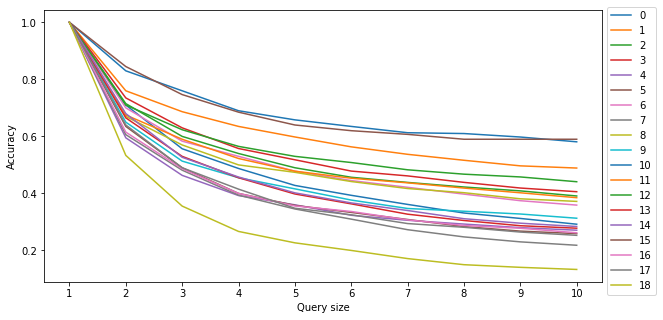

In [122]:
plt.figure(figsize=(10,5))
for i in range(0,19):
    plt.plot(np.arange(1,11), acc_array[:,i])
    plt.xticks(np.arange(1,11))
    plt.xlabel('Query size')
    plt.ylabel('Accuracy')
    plt.legend(np.arange(0,19), bbox_to_anchor = (1, 1.03))

In [65]:
pr_curve

[(1.0, 1.0),
 (0.7064676616915423, 0.71),
 (0.5818815331010453, 0.5566666666666666),
 (0.5078125, 0.4875),
 (0.45052631578947366, 0.428),
 (0.41403508771929826, 0.3933333333333333),
 (0.37537091988130566, 0.36142857142857143),
 (0.35286284953395475, 0.33125),
 (0.3286549707602339, 0.31222222222222223)]

In [66]:
np.array(pr_curve)[:,1]

array([1.        , 0.71      , 0.55666667, 0.4875    , 0.428     ,
       0.39333333, 0.36142857, 0.33125   , 0.31222222])

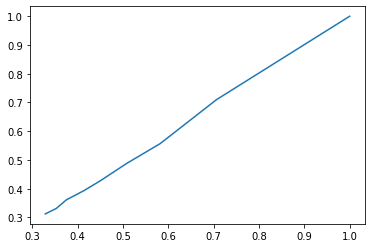

In [67]:
plt.plot(np.array(pr_curve)[:,0], np.array(pr_curve)[:,1])

In [ ]:
# metric for distance approach
# fine grained classes

# f1 and roc curve
# metrics for differnt query lengths (report thing)
# presentation

In [163]:
d

{0: array([214.,  20.,  38.,  25.,  11.,   8.,  11.,  14.,  10.,  10.,   9.,
         26.,  34.,  18.,  16.,   9.,  12.,  11.,   4.]),
 1: array([ 17., 299.,  51.,  12.,   5.,   4.,  20.,   2.,   4.,   2.,   2.,
          8.,   6.,  12.,  22.,  19.,  10.,   4.,   1.]),
 2: array([ 35.,  48., 245.,  38.,   3.,  10.,   2.,   2.,   4.,   2.,  13.,
         20.,  22.,  20.,  17.,   5.,  11.,   3.,   0.]),
 3: array([ 13.,  16.,  30., 259.,  10.,  24.,   5.,   9.,   6.,  20.,  31.,
          4.,   2.,  13.,  16.,   6.,  20.,  14.,   2.]),
 4: array([ 14.,  14.,   9.,  19., 180.,  33.,  14.,  19.,  15.,  16.,   3.,
         12.,   8.,  13.,  33.,  46.,  17.,  26.,   9.]),
 5: array([  8.,  13.,  12.,  44.,  37., 179.,   9.,  19.,  28.,  24.,  10.,
          6.,   0.,   5.,  23.,  32.,  18.,  27.,   6.]),
 6: array([ 20.,  30.,  16.,  14.,   5.,   9., 239.,  25.,   8.,   6.,   8.,
         18.,  16.,  12.,  38.,   5.,  19.,  11.,   1.]),
 7: array([ 14.,  15.,  11.,  23.,  23.,  19.,  41., 17